In [1]:
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

plt.style.use('ggplot')

In [2]:
boston = datasets.load_boston()
dataset = train_test_split(boston.data, boston.target,
                            test_size=0.2)

train_data, test_data, train_labels, test_labels = dataset

In [3]:
scaler = StandardScaler()

# we fit the train data
scaler.fit(train_data)

# scaling the train data
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [4]:
mlp = MLPRegressor(hidden_layer_sizes=(10, 5), max_iter=1000)

mlp.fit(train_data, train_labels)

print(mlp)

MLPRegressor(hidden_layer_sizes=(10, 5), max_iter=1000)


In [5]:
expected_y = test_labels
predicted_y = mlp.predict(test_data)
print(metrics.r2_score(expected_y, predicted_y))

0.6575580274503102


In [6]:
print(metrics.mean_squared_log_error(expected_y, predicted_y))

0.04006896538980656


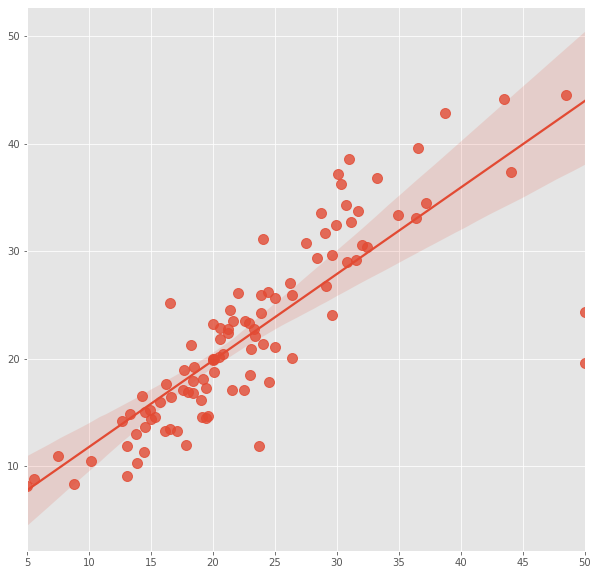

In [7]:
plt.figure(figsize=(10,10))
sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})